# Predicting heart disease via machine learning

This notebook looks into using various Python-based ML libraries to build a model which predicts wheter a patient has heart disease or not based on their medical attributes.

Following approach will be followed:

    1. Problem definition
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
    6. Experimentation
    
## Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data

> This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. 

## Evaluation

> If we can reach 95% accuracy at predicting heart disease, we will pursue the project further.

## Features

**Create data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [143]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [6]:
hd = pd.read_csv("heart-disease.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Now we explore the data (Exploratory data analysis on EDA)

The goal is to find out more about the data and become an expert on the subject matter

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types
3. Whats missing and how do we deal with it
4. Where are the outliers and why should you care about them?
5. How can you add, change, or remove features to get more out of your data.

In [8]:
hd["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

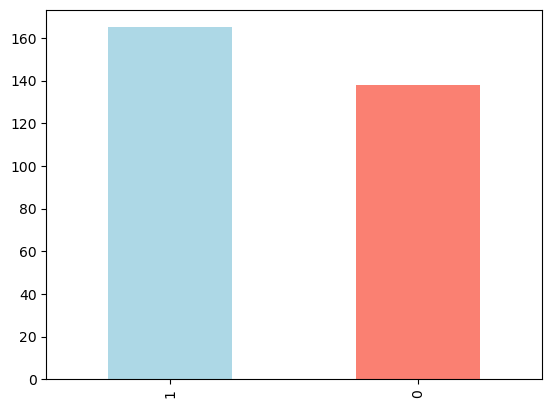

In [11]:
hd["target"].value_counts().plot.bar(color = {"salmon", "lightblue"});

In [13]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
hd.isna().sum()
#Nice!

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Gender

In [19]:
hd.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [20]:
pd.crosstab(hd.target, hd.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

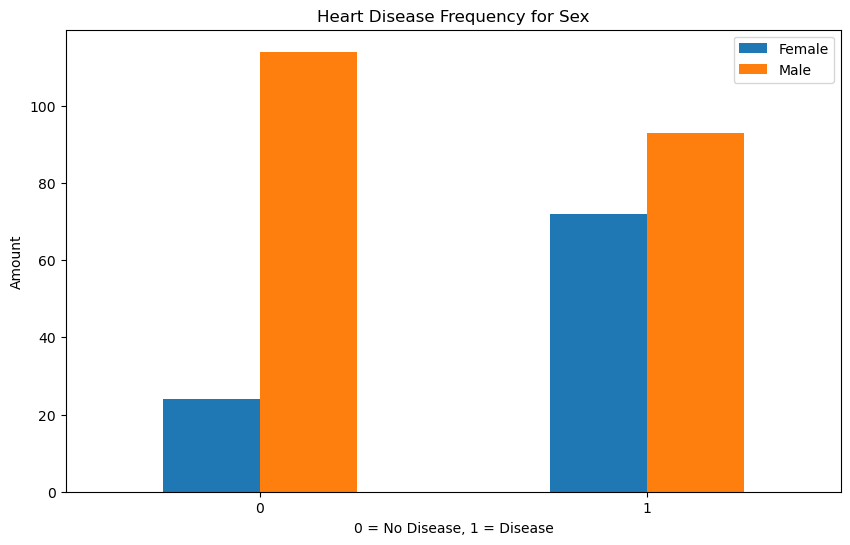

In [61]:
pd.crosstab(hd.target, hd.sex).plot(kind = "bar",
                                    figsize =(10,6),
                                    title = "Heart Disease Frequency for Sex",
                                    xlabel = "0 = No Disease, 1 = Disease",
                                    ylabel = "Amount");

plt.legend(['Female', 'Male']);
plt.xticks(rotation = 0)

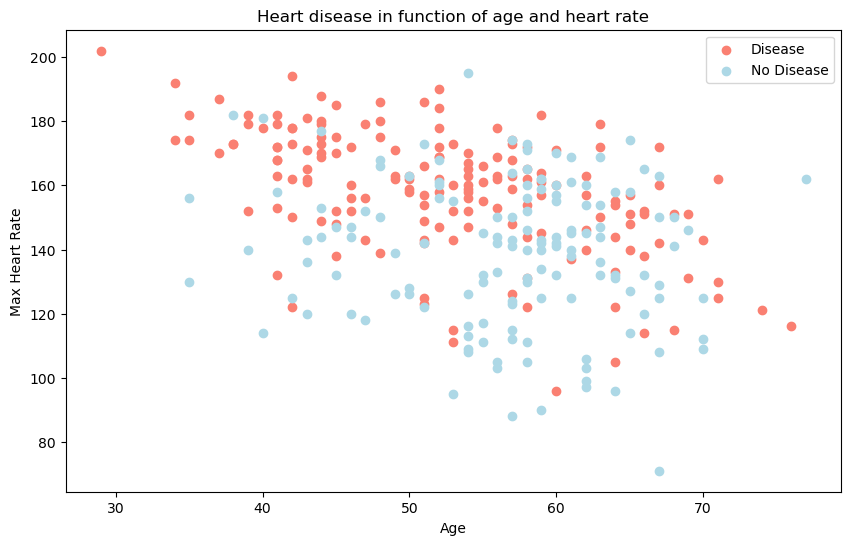

In [68]:
plt.figure(figsize = (10,6))
plt.scatter(hd.age[hd.target == 1],
           hd.thalach[hd.target == 1],
           c= "salmon")
plt.scatter(hd.age[hd.target == 0],
           hd.thalach[hd.target == 0],
           c= "lightblue")
plt.title("Heart disease in function of age and heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

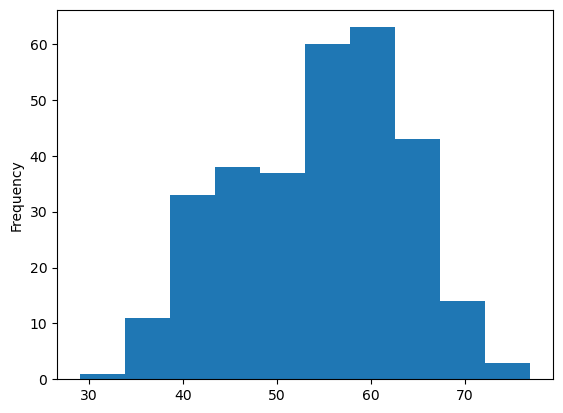

In [78]:
hd.age.plot.hist(bins = 10);

In [80]:
pd.crosstab(hd.cp, hd.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

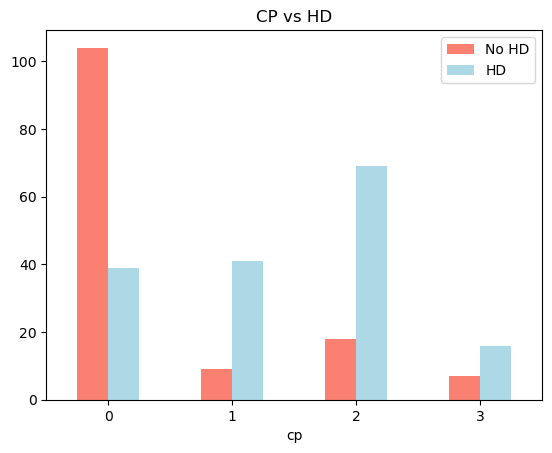

In [87]:
pd.crosstab(hd.cp, hd.target).plot.bar(color = ["salmon", "lightblue"]);

plt.legend(["No HD", "HD"])
plt.title("CP vs HD")
plt.xticks(rotation = 0)

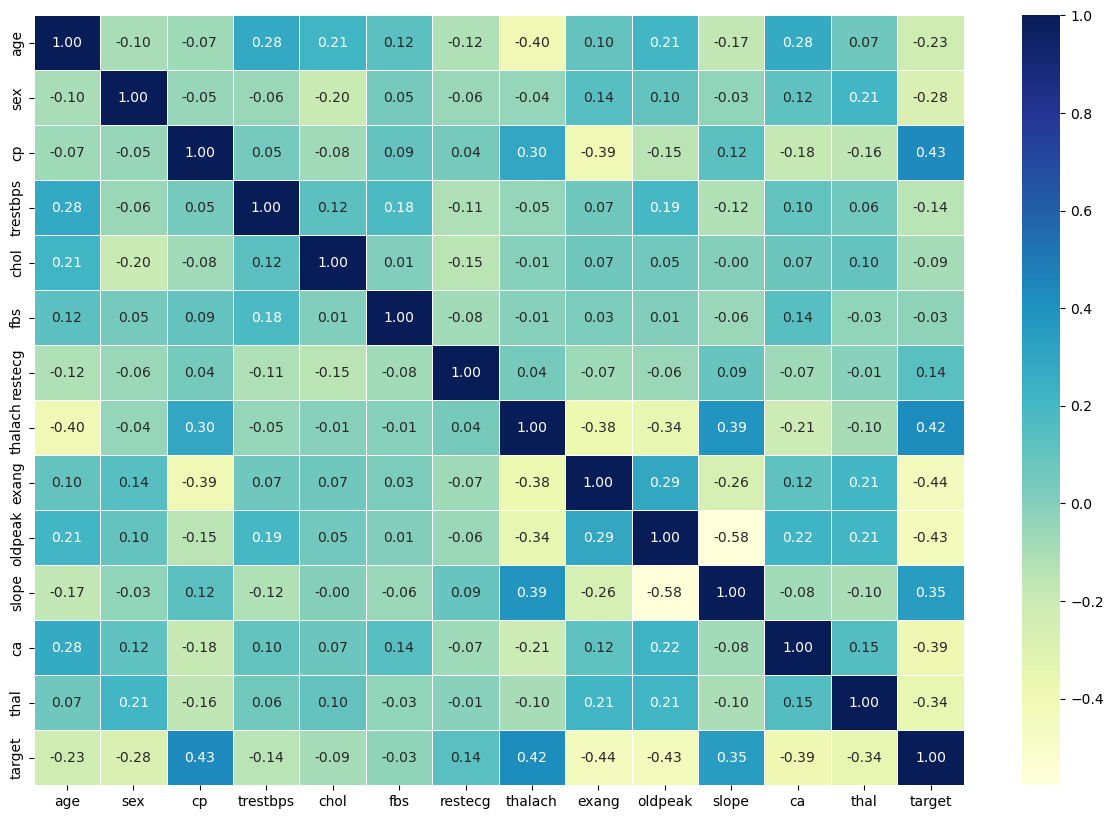

In [94]:
cm = hd.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(cm,
                annot = True,
                linewidths=0.5,
                fmt =".2f",
                cmap= "YlGnBu");

## Modelling

In [102]:
x = hd.drop("target", axis = 1)
y = hd["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [111]:
np.random.seed(42)

models = {"LR": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RF": RandomForestClassifier()}

def fitnscore(models, x_train, x_test, y_train, y_test):
    
    model_scores = {}
    
    for name, model in models.items():
        
        m = model
        m.fit(x_train, y_train)
        model_scores[name] = m.score(x_test, y_test)
        
    return model_scores
        
stuff = fitnscore(models, x_train, x_test, y_train, y_test)
stuff


C:\Users\Public\MLP1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.7868852459016393, 'KNN': 0.6065573770491803, 'RF': 0.8360655737704918}

## Model Comparsion

<AxesSubplot: >

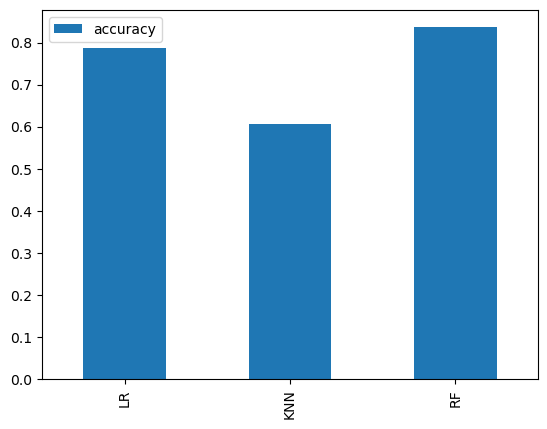

In [117]:
mc = pd.DataFrame(stuff, index = ["accuracy"])
mc.T.plot.bar()

### Improving our baseline models

* Hyperparameter tuning
* Feature importance
* Evaluation stuff

In [119]:
#Tuning KNN 

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))
    


In [120]:
train_scores


[1.0,
 0.78099173553719,
 0.7727272727272727,
 0.7603305785123967,
 0.78099173553719,
 0.7479338842975206,
 0.7231404958677686,
 0.7272727272727273,
 0.731404958677686,
 0.7272727272727273,
 0.7107438016528925,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.7107438016528925,
 0.7107438016528925,
 0.6983471074380165,
 0.6983471074380165,
 0.7024793388429752,
 0.7024793388429752]

In [121]:
test_scores

[0.6065573770491803,
 0.5245901639344263,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.5245901639344263,
 0.5901639344262295,
 0.5573770491803278,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.5737704918032787,
 0.5737704918032787,
 0.5573770491803278,
 0.6065573770491803,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803]

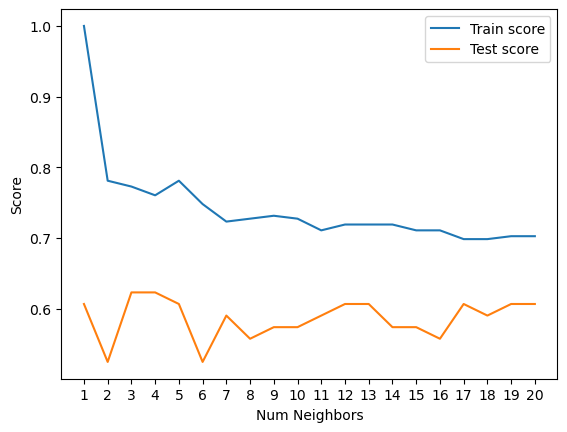

In [126]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xlabel("Num Neighbors")
plt.ylabel("Score")
plt.legend()
plt.xticks(np.arange(1,21,1));

### Hyperparameter tuning using randomized search cv

In [129]:
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [132]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter= 20,
                                verbose = 2)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

{'solver': 'liblinear', 'C': 1.623776739188721}

In [133]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [134]:
rs_log_reg.score(x_test, y_test)

0.7868852459016393

In [136]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter= 20,
                                verbose = 2)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.4s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [137]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [138]:
rs_rf.score(x_test, y_test)

0.819672131147541

In [140]:
gs_log_ref = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         verbose=2,
                         cv = 5)
gs_log_ref.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [141]:
gs_log_ref.score(x_test, y_test)

0.7868852459016393

In [142]:
gs_log_ref.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

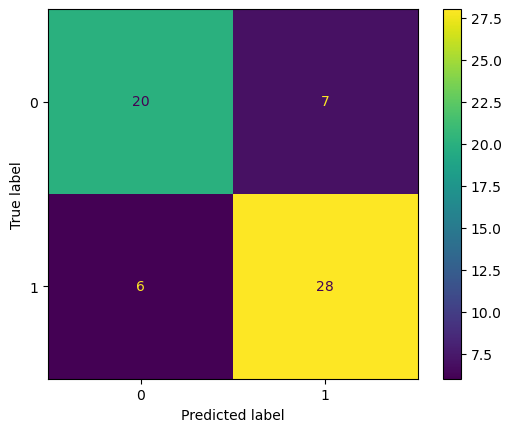

In [146]:
ConfusionMatrixDisplay.from_estimator(gs_log_ref, x_test, y_test);

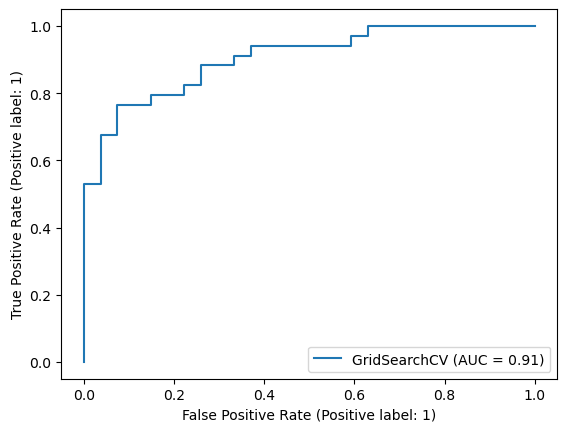

In [153]:
RocCurveDisplay.from_estimator(gs_log_ref, x_test, y_test);

In [151]:
bruh = classification_report(y_test, gs_log_ref.predict(x_test));
print(bruh)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.80      0.82      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [154]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, gs_log_ref.predict(x_test))

0.7821350762527233

In [156]:
cv_acc = cross_val_score(gs_log_ref,
                        x,
                        y,
                        cv = 5,
                        scoring = "accuracy")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03359818286283781, solver=liblinear; total time=   0.0s
[CV] END ............C=0.033

[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.6

[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.7

[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END ..............C=78.47599703514607, solver=liblinear; total time=   0.0s
[CV] END ..............C=78.47599703514607, solver=liblinear; total time=   0.0s
[CV] END ..............C=78.47599703514607, solver=liblinear; total time=   0.0s
[CV] END ..............C=78.47599703514607, solver=liblinear; total time=   0.0s
[CV] END ..............C=78.47599703514607, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ..............C=545

array([0.81967213, 0.90163934, 0.8852459 , 0.86666667, 0.75      ])

In [157]:
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.86666667, 0.75      ])

In [158]:
cv_f1 = cross_val_score(gs_log_ref,
                        x,
                        y,
                        cv = 5,
                        scoring = "f1")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0018329807108324356, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.0127

[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.6

[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.2

[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END ..............C=78.47599703514607, solver=liblinear; total time=   0.0s
[CV] END ..............C=78.47599703514607, solver=liblinear; total time=   0.0s
[CV] END ..............C=78.47599703514607, solver=liblinear; total time=   0.0s
[CV] END ..............C=78.

In [159]:
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.88235294, 0.79452055])

In [160]:
cv_precision = cross_val_score(gs_log_ref,
                        x,
                        y,
                        cv = 5,
                        scoring = "precision")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03359818286283781, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03359818286283781, solver=liblinear; total time=   0.0s
[CV] END ............C=0.033

[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.6

[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.7

[CV] END ..............C=78.47599703514607, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=14

In [161]:
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.85714286, 0.725     ])

In [162]:
cv_recall = cross_val_score(gs_log_ref,
                        x,
                        y,
                        cv = 5,
                        scoring = "recall")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03359818286283781, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03359818286283781, solver=liblinear; total time=   0.0s
[CV] END ............C=0.033

[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ............C=0.23357214690901212, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.615848211066026, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.2

[CV] END ..............C=1.623776739188721, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.281332398719396, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=29.763514416313132, solver=liblinear; total time=   0.0s
[CV] END .............C=29.7

[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ..............C=545.5594781168514, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=1438.44988828766, solver=liblinear; total time=   0.0s
[CV] END ...............C=14

In [164]:
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.90909091, 0.87878788])

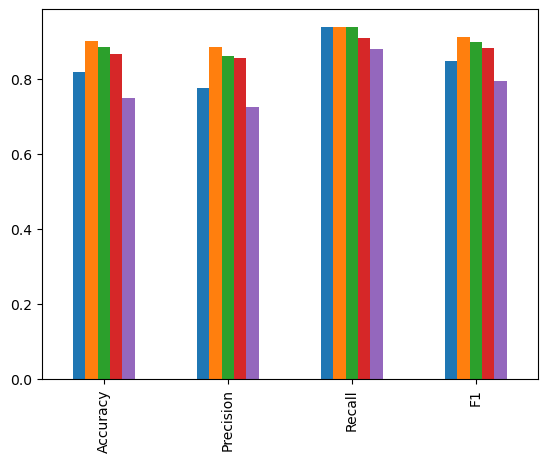

In [174]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1})
cv_metrics.T.plot.bar(legend = False);

### Feature Importance

Which features contributed the most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each ML model

Below we will do for our Logistic Regression Model



In [184]:
gs_log_ref.best_params_

clf = LogisticRegression(C = 1.623776739188721, solver = 'liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [185]:
clf.coef_

array([[ 0.01243147, -1.32141296,  0.90400469, -0.02071739, -0.0017648 ,
        -0.01492542,  0.55226371,  0.02793282, -0.96883901, -0.69236618,
         0.5148994 , -0.5563833 , -0.61045576]])

In [186]:
feature_dict = dict(zip(hd.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.012431466153872892,
 'sex': -1.3214129565450297,
 'cp': 0.9040046920719955,
 'trestbps': -0.020717388408280527,
 'chol': -0.0017647973768308255,
 'fbs': -0.014925417681798437,
 'restecg': 0.5522637112392482,
 'thalach': 0.027932819842654152,
 'exang': -0.968839005041972,
 'oldpeak': -0.6923661759985847,
 'slope': 0.5148993981951121,
 'ca': -0.5563832999431454,
 'thal': -0.6104557618460134}

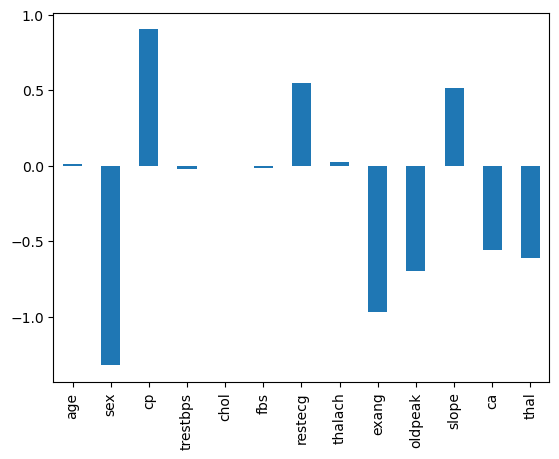

In [190]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(legend = False);